In [40]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report # for model evaluation metrics

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Importacion del conjunto de datos

In [4]:
# leemos el conjunto de datos y lo guardamos en una variable llamada data
# https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation
data = pd.read_csv('data.csv')
pd.options.display.max_columns = 14 # mostramos las 14 columnas que tiene nuestro dataset, (columnas totales)
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


# Analisis descriptivo
## Calculamos datos estadisticos

In [98]:
# Analisis descriptivo
# Hallamos datos estadisticos
# metadata de nuestro dataset: numbero de columnas, tipo de columnas, numbero de no nulls, memoria ...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [102]:
# Hallamos datos estadisticos para todas las columnas
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


## Estudio de las variables categoricas

### 1. Variable categorica "key", mapea integers to pitches:
- 0 => C
- 1 => C#/Db
- 2 => D
- 3 => D#/Eb
- 4 => E
- 5 => F
- 6 => F#/Gb
- 7 => G
- 8 => G#/Ab
- 9 => A
- 10 => A#/Bb
- 11 => B

In [9]:
# Estudiamos las variables categoricas
# variable categorica "key": mapea integers to pitches:
# 0 => C
# 1 => C#/Db
# 2 => D
# 3 => D#/Eb
# 4 => E
# 5 => F
# 6 => F#/Gb
# 7 => G
# 8 => G#/Ab
# 9 => A
# 10 => A#/Bb
# 11 => B
key = data['key'].value_counts() # contamos las frecuencias de la variable categorica key para cada categoria
key

1     30
8     22
6     20
7     19
9     18
5     18
10    17
2     15
0     12
11    10
4      9
3      5
Name: key, dtype: int64

array([[<AxesSubplot:title={'center':'key'}>]], dtype=object)

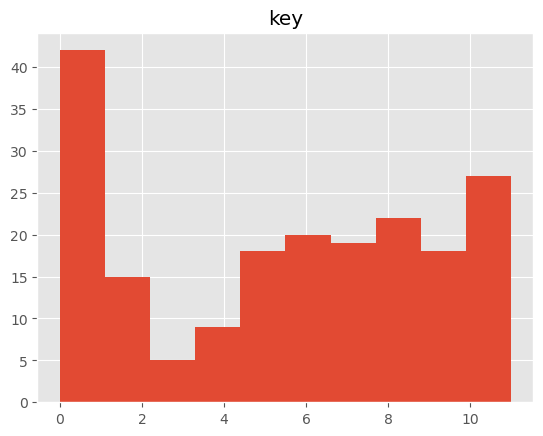

In [103]:
# representamos el histograma de la variable categoria para visualizar numero de frecuencias para cada categoria
# observamos que la categoria 0 => C, es la que mas frecuencias tiene
data.hist(column='key')

## 2. Variable categorica "mode", es la modalidad:
- 1 => major
- 0 => minor

In [104]:
# Estudiamos las variables categoricas
# variable categorica "mode" => es la modalidad:
# 1 => major
# 0 => minor
mode = data['mode'].value_counts() # contamos las frecuencias de la variable categorica key para cada categoria
mode

1    105
0     90
Name: mode, dtype: int64

array([[<AxesSubplot:title={'center':'mode'}>]], dtype=object)

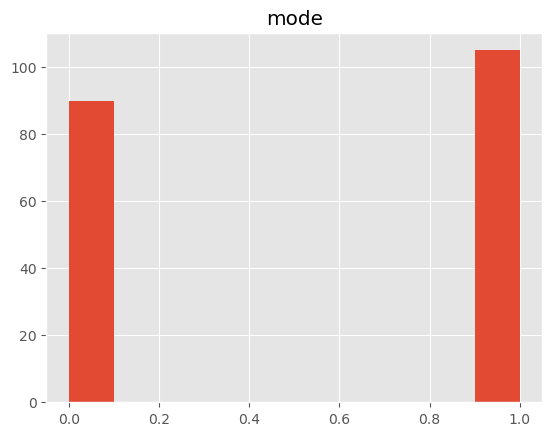

In [105]:
# representamos el histograma de la variable categoria para visualizar numero de frecuencias para cada categoria
# observamos que la categoria 1, es la que mas frecuencias tiene
data.hist(column='mode')

## 3. Variable categorica "liked", es la variable dependiente o respuesta:
- 1 => like
- 0 => dislike

In [13]:
# Estudiamos las variables categoricas
# variable categorica "liked": es la variable dependiente o respuesta
# 1 => like
# 0 => dislike
liked = data['liked'].value_counts() # contamos las frecuencias de la variable categorica key para cada categoria
liked

1    100
0     95
Name: liked, dtype: int64

array([[<AxesSubplot:title={'center':'liked'}>]], dtype=object)

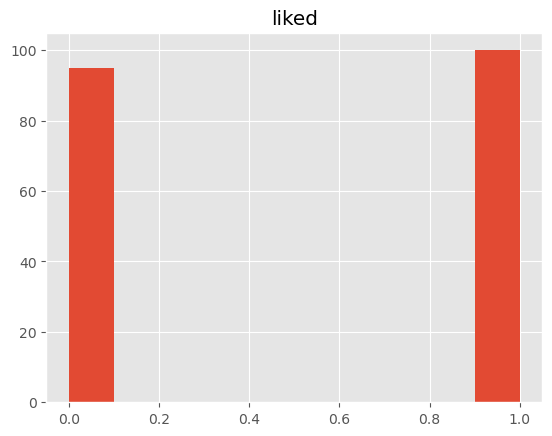

In [106]:
# representamos el histograma de la variable categoria para visualizar numero de frecuencias para cada categoria
data.hist(column='liked')

## Analisis de correlacion de variables

In [107]:
# Analisis descriptivo
# Estudio de la correlacion
corr = data.corr()
corr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
danceability,1.000000,0.137188,-0.063906,0.455078,0.043759,0.388596,-0.234176,-0.807053,-0.137069,0.612344,0.223522,-0.232621,0.317096,0.569425
energy,0.137188,1.000000,0.130251,0.813567,-0.068308,0.122825,-0.772583,-0.241444,0.166508,0.319409,0.214905,-0.134527,0.123942,0.176179
key,-0.063906,0.130251,1.000000,0.046865,-0.103371,-0.093395,-0.066844,0.003597,-0.039622,0.033336,0.097240,0.054522,0.048344,-0.044406
loudness,0.455078,0.813567,0.046865,1.000000,-0.041678,0.279710,-0.664989,-0.538266,0.078093,0.363532,0.274462,-0.206334,0.207806,0.410774
mode,0.043759,-0.068308,-0.103371,-0.041678,1.000000,0.031953,-0.025709,0.075442,-0.048661,0.033409,-0.036270,-0.060965,-0.110739,0.023747
speechiness,0.388596,0.122825,-0.093395,0.279710,0.031953,1.000000,-0.079710,-0.343242,-0.006665,0.180708,0.313918,-0.388397,0.140325,0.591505
acousticness,-0.234176,-0.772583,-0.066844,-0.664989,-0.025709,-0.079710,1.000000,0.294320,-0.140988,-0.313806,-0.255097,0.138793,-0.142177,-0.179375
instrumentalness,-0.807053,-0.241444,0.003597,-0.538266,0.075442,-0.343242,0.294320,1.000000,0.055730,-0.572224,-0.299493,0.249683,-0.375199,-0.569440
liveness,-0.137069,0.166508,-0.039622,0.078093,-0.048661,-0.006665,-0.140988,0.055730,1.000000,-0.013004,-0.010555,-0.143966,-0.135409,-0.009797
valence,0.612344,0.319409,0.033336,0.363532,0.033409,0.180708,-0.313806,-0.572224,-0.013004,1.000000,0.218017,-0.114842,0.201111,0.268653


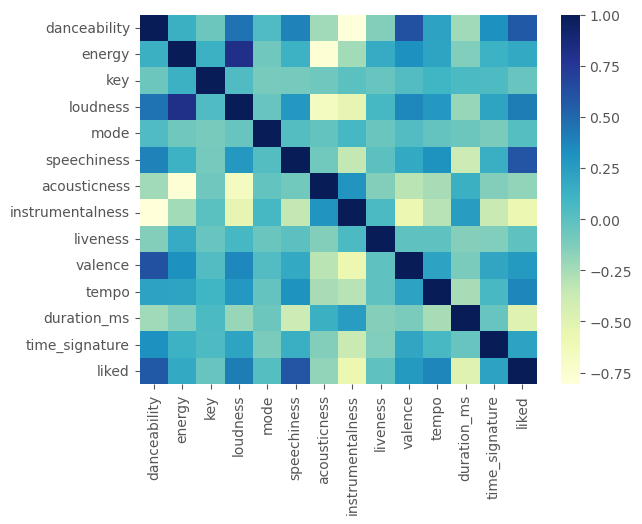

In [108]:
# Visualizamos la correlacion de todas nuestras variables representando un mapa de calor
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=False)
import matplotlib.pyplot as mp
mp.show() # displaying heatmap

## Estudio de la correlacion entre variables
#### Definimos alta correlacion si el valor de correlacion supera los 0.8

In [109]:
corrGreater = corr[corr>=.8]
corrGreater

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
danceability,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,1.000000,NaN,0.813567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
key,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,0.813567,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mode,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


### Observando el mapa de calor y la matriz de correlacion, vemos que hay dos variables muy correlacionadas:

### energy <=> loudnes 
Tienen una valor de correlacion del 0.813567, por lo que estan altamente correlacionadas. Observando las definiciones para cada variable vemos:
- energy: Intensity and activity. Typically, energetic tracks feel fast, loud, and noisy
- loudness: The overall loudness of a track in decibels (dB)

Podemos ver claro que a mayor energy, mayor loudness, por lo que confirmamos que estan altamente correlacionadas.

Vemos que tenemos otra correlacion medianamente alta, aunque no supera nuestro umbral de 0.8, pero vamos a estudiarla:

### danceability <=> valence 
Con valor de correlacion 0.612344, podemos pensar que estan correlacionada, Observando las definiciones de las variables tenemos:
- danceability: How suitable a track is for dancing
- valence: Musical positiveness conveyed by a track
Estan bastante correlaccionadas, vemos que si la cancion es positiva, crea un estado de felicidad en la persona, por lo tanto es muy probable que sea una cancion bailable

Observamos tambien correlaciones con la variable dependiente pero esas no las analizamos por que son los gustos del autor

Realizaremos un estudio de la covarianza para ver si podemos eleminar alguna variable.

## Estudio de la covarianza

La covarianza es igual que cero cuando no hay relación existente.

In [113]:
cov=data.cov()
cov['energy'] 

danceability           0.007729
energy                 0.067650
key                    0.115700
loudness               1.380744
mode                  -0.008880
speechiness            0.003847
acousticness          -0.064460
instrumentalness      -0.021742
liveness               0.004590
valence                0.022239
tempo                  1.569827
duration_ms        -2524.612375
time_signature         0.014550
liked                  0.022963
Name: energy, dtype: float64

In [114]:
cov=data.cov()
cov['danceability'] 

danceability           0.046922
energy                 0.007729
key                   -0.047277
loudness               0.643219
mode                   0.004738
speechiness            0.010136
acousticness          -0.016272
instrumentalness      -0.060527
liveness              -0.003146
valence                0.035508
tempo                  1.359809
duration_ms        -3635.678425
time_signature         0.031001
liked                  0.061811
Name: danceability, dtype: float64

### Analisis de la covarianza
energy loudness = 1.380744
energy valence = 0.035508

Observamos que los valores son cercanos a cero, por lo tanto optamos con NO eliminar ninguna de nuestras variables

## Deteccion y tratamiento de datos ausentes

In [99]:
# check para ver el total de valores nulos en nuestro dataset
# observamos que no tenemos valores nulls
data.isnull().values.sum()

0

In [101]:
# check para ver el total de valores nulos en cada columna
# al igual que antes, vemos que no hay valores nulls por columa
data.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

#### No tenemos datos nulos por lo que no tenemos que hacer nada al respecto

# Visualizacion del conjunto de datos por pares de variables

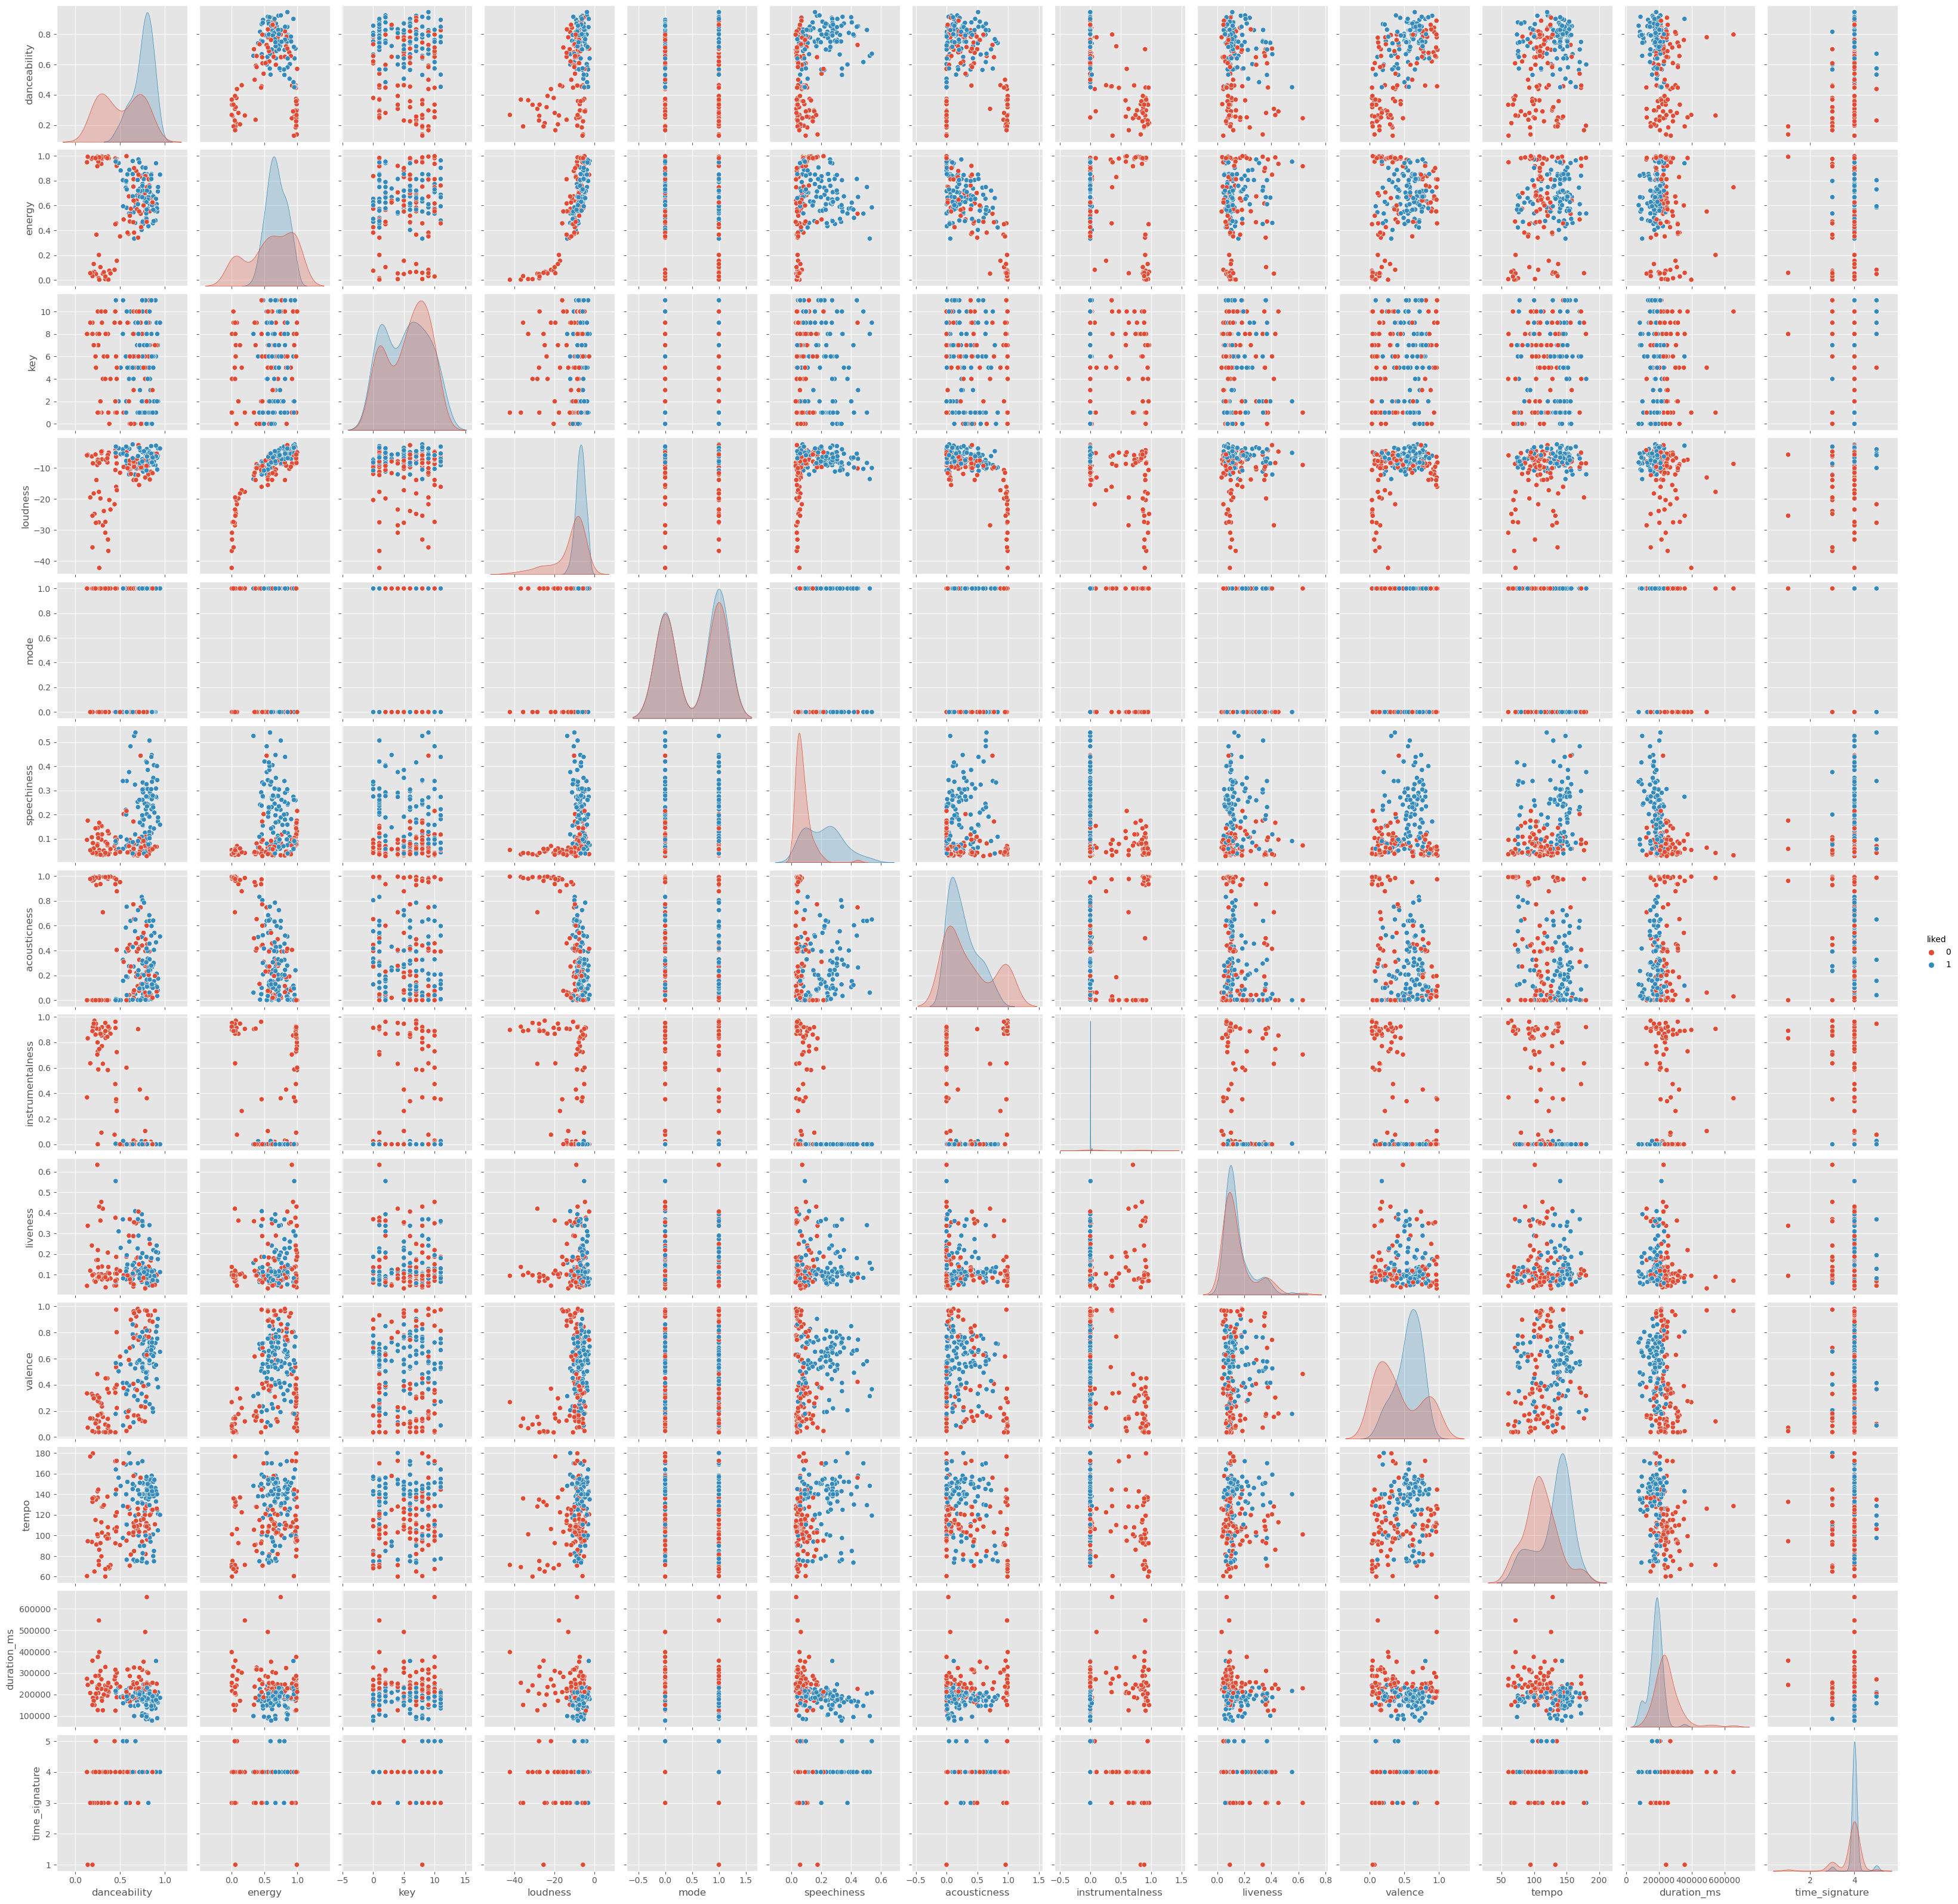

In [22]:
sns.pairplot(data, hue='liked', vars=['danceability', 'energy', 'key', 'loudness', 
                                      'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                                      'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'])
plt.show()

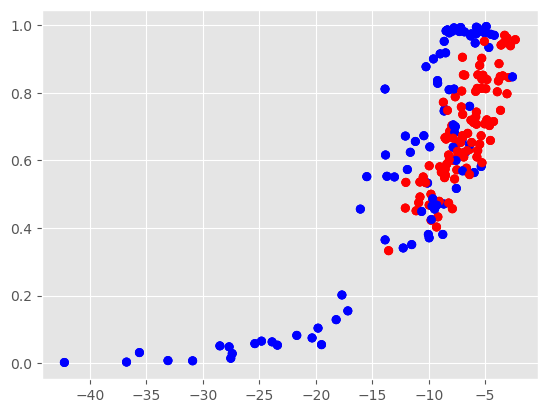

In [25]:
# representamos aleatoriamente alguno que nos parezca interesante un poco mas grande
# loudness <=> energy
plt.scatter(data.loudness, data.energy, c=data.liked)
plt.show()
# observamos en la grafica que los datos no son facilmente separables por un hiperplano

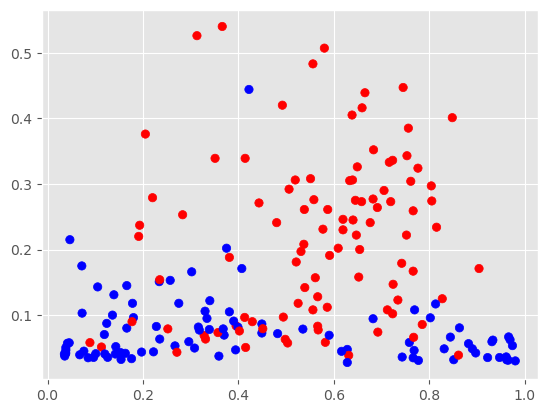

In [28]:
# speachness <=> valence
plt.scatter(data.valence, data.speechiness, c=data.liked)
plt.show()
# observamos en la grafica que los datos no son facilmente separables por un hiperplano

#### Hemos observado que representando nuestras variables en planos de una dimension, no son facilmente separables por un hiperplano, por lo que vamos a aplicar maquinas de vector de soporte

# Maquinas de vector de soporte (SVM)
El algoritmo despues de haber sido entrenado, podra predecir si una cancion aleatoria/nueva le gusta al autor o no.
#### Analizaremos el kernel lineal y el kernel radial con diferentes valores de C y gamma


In [5]:
# División de los datos en train y test
# ==============================================================================
X = data.drop(columns = 'liked')
y = data['liked']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, shuffle = True)

In [80]:
# Creamos funciones genericas que nos serviran para el posterior analisis del algoritmo
# =====================================================================================

# entrenamiento del modelo, prediccion de resultados y reporte metrico 
def fitting(X_train, X_test, y_train, y_test, kernel, C, gamma):    
    # create the model
    model = SVC(C = C, kernel = kernel, random_state = 42, gamma = gamma, probability=True)
    
    # fit the model, entrenamos al modelo con nuestros datos de entrenamiento y predecinos con nuestros datos de test
    model.fit(X_train, y_train)  

    # Predict class labels on training data
    prediction_train = model.predict(X_train)
    # Predict class labels on a test data
    predicion_test = model.predict(X_test)
    
    print('----- Evaluation on Test Data -----')
    score_test_data = model.score(X_test, y_test)
    print('Accuracy Score: ', score_test_data)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, predicion_test))
    print('--------------------------------------------------------')
    # Matriz de confusión de las predicciones de test
    print('----- Confusion Matrix on Test Data -----')
    confusion_matrix_test = pd.crosstab(
        y_test.ravel(),
        predicion_test,
        rownames=['Real'],
        colnames=['Predicción']
    )
    print(confusion_matrix_test)
    print('--------------------------------------------------------')
    print('----- Evaluation on Training Data -----')
    score_train = model.score(X_train, y_train)
    print('Accuracy Score: ', score_train)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, prediction_train))
    print('--------------------------------------------------------')
    # Matriz de confusión de las predicciones de train
    print('----- Confusion Matrix on Training Data -----')
    confusion_matrix_train = pd.crosstab(
        y_train.ravel(),
        prediction_train,
        rownames=['Real'],
        colnames=['Predicción']
    )
    print(confusion_matrix_train)
    print('--------------------------------------------------------')
    
    return model

# plot using PCA visualization - principal component analysis
def customPCAPlot(X_train, X_test, y_train, y_test, model):
    pca = PCA(n_components = 13)
    scaler = StandardScaler()
    X_train_t = pca.fit_transform(X_train)
    X_test_t = pca.transform(X_test)
    X_train_t = scaler.fit_transform(X_train_t)
    X_test_t = scaler.transform(X_test_t)
    
    # Vectores soporte
    plt.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=10, linewidth=1,
        facecolors='none', edgecolors='black'
    )
    
    # Hiperplano de separación
    plt.contour(
        X_test_t,
        y_test,
        model.decision_function(X_test_t).reshape(X_test_t.shape),
        colors = 'k',
        levels = [-1, 0, 1],
        alpha  = 0.5,
        linestyles = ['--', '-', '--']
    )

    plt.scatter(X_test_t[:,0],X_test_t[:,1],c=y_test,cmap='plasma')
    plt.xlabel('First principal component')
    plt.ylabel('Second Principal Component')
    print('----- PCA visualisation with test Data ---------------------------------------')
    plt.show()
    
    plt.scatter(X_train_t[:,0],X_train_t[:,1],c=y_train,cmap='plasma')
    plt.xlabel('First principal component')
    plt.ylabel('Second Principal Component')
    print('----- PCA visualisation with training Data -----------------------------------')
    plt.show()


## Estudio del modelo SVM lineal con diferences valores de C

In [44]:
# Evaluacion del modelo SVM lineal con C = 100 y gamma scale
# ==============================================================================
model = fitting(X_train, X_test, y_train, y_test, 'linear', 100, 'scale')

----- Evaluation on Test Data -----
Accuracy Score:  0.8205128205128205
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.65      0.79        20

    accuracy                           0.82        39
   macro avg       0.87      0.82      0.82        39
weighted avg       0.87      0.82      0.82        39

--------------------------------------------------------
----- Confusion Matrix on Test Data -----
Predicción   0   1
Real              
0           19   0
1            7  13
--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7371794871794872
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        76
           1       0.78      0.68      0.72        80

    accuracy                           0.74       156
   macro avg       0.74      0.74      0.74       156
weighted avg       0.

In [81]:
customPCAPlot(X_train, X_test, y_train, y_test, model)

TypeError: Input z must be 2D, not 1D

In [65]:
# Evaluacion del modelo SVM lineal con C = 1 y gamma scale
# ==============================================================================
fitting(X_train, X_test, y_train, y_test, 'linear', 1, 'scale')

----- Evaluation on Test Data -----
Accuracy Score:  0.8461538461538461
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        19
           1       0.89      0.80      0.84        20

    accuracy                           0.85        39
   macro avg       0.85      0.85      0.85        39
weighted avg       0.85      0.85      0.85        39

--------------------------------------------------------
----- Confusion Matrix on Test Data -----
Predicción   0   1
Real              
0           17   2
1            4  16
--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7884615384615384
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        76
           1       0.79      0.80      0.80        80

    accuracy                           0.79       156
   macro avg       0.79      0.79      0.79       156
weighted avg       0.

SVC(C=1, kernel='linear', probability=True, random_state=42)

----- PCA visualisation with test Data ---------------------------------------


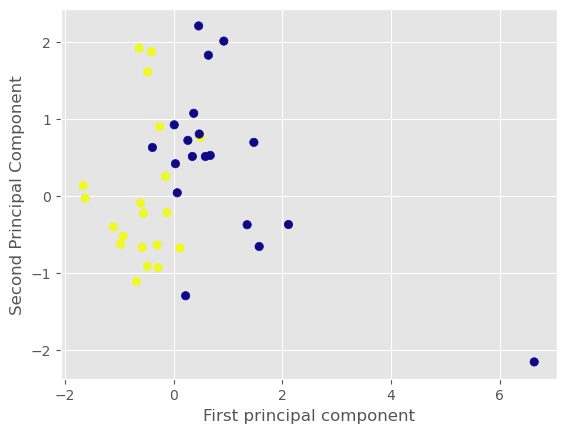

----- PCA visualisation with training Data -----------------------------------


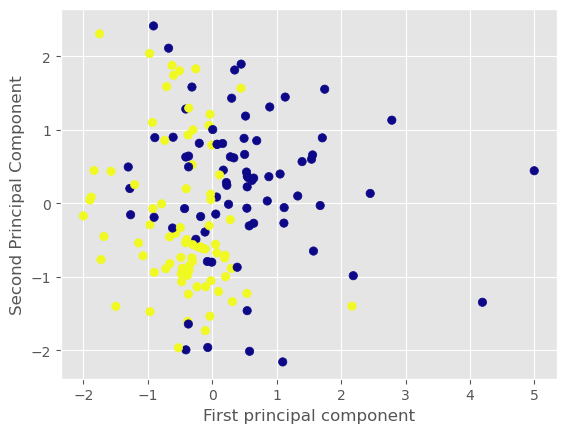

In [66]:
customPCAPlot(X_train, X_test, y_train, y_test)

In [191]:
# Evaluacion del modelo SVM lineal con C = 0.0001 y gamma scale
# ==============================================================================
fitting(X_train, X_test, y_train, y_test, 'linear', 0.0001, 'scale')

----- Evaluation on Test Data -----
Accuracy Score:  0.8205128205128205
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        19
           1       0.88      0.75      0.81        20

    accuracy                           0.82        39
   macro avg       0.83      0.82      0.82        39
weighted avg       0.83      0.82      0.82        39

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7628205128205128
              precision    recall  f1-score   support

           0       0.79      0.70      0.74        76
           1       0.74      0.82      0.78        80

    accuracy                           0.76       156
   macro avg       0.77      0.76      0.76       156
weighted avg       0.77      0.76      0.76       156

--------------------------------------------------------
----- Confusion Matrix on Test Data -----
Predicción   0   1
Real              
0   

SVC(C=0.0001, kernel='linear', probability=True, random_state=42)

### Analisis de los resultados para C = 100, C = 1 y C = 0.001, y gamma = scale
Observamos que para C = 100 el sistema tiene un Accuracy Score: 0.8205128205128205 con los datos de test, para valores de C = 1 o c = 0.001, obtenemos peores resultados en precision. Por lo que podemos decir que el valor de C = 100 es el que trabaja mejor para SVM kernel lineal

## Estudio del modelo SVM lineal con C = 100 y diferentes valores de gamma

In [192]:
# Evaluacion del modelo SVM lineal con C = 100 y gamma = 100
# ==============================================================================
fitting(X_train, X_test, y_train, y_test, 'linear', 100, 100)

----- Evaluation on Test Data -----
Accuracy Score:  0.8205128205128205
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.65      0.79        20

    accuracy                           0.82        39
   macro avg       0.87      0.82      0.82        39
weighted avg       0.87      0.82      0.82        39

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7371794871794872
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        76
           1       0.78      0.68      0.72        80

    accuracy                           0.74       156
   macro avg       0.74      0.74      0.74       156
weighted avg       0.74      0.74      0.74       156

--------------------------------------------------------
----- Confusion Matrix on Test Data -----
Predicción   0   1
Real              
0   

SVC(C=100, gamma=100, kernel='linear', probability=True, random_state=42)

In [135]:
# Evaluacion del modelo SVM lineal con C = 100 y gamma = 1
# ==============================================================================
fitting(X_train, X_test, y_train, y_test, 'linear', 100, 1)

----- Evaluation on Test Data -----
Accuracy Score:  0.8205128205128205
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.65      0.79        20

    accuracy                           0.82        39
   macro avg       0.87      0.82      0.82        39
weighted avg       0.87      0.82      0.82        39

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7371794871794872
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        76
           1       0.78      0.68      0.72        80

    accuracy                           0.74       156
   macro avg       0.74      0.74      0.74       156
weighted avg       0.74      0.74      0.74       156

--------------------------------------------------------


In [136]:
# Evaluacion del modelo SVM lineal con C = 100 y gamma = 0.000001
# ==============================================================================
fitting(X_train, X_test, y_train, y_test, 'linear', 100, 0.000001)

----- Evaluation on Test Data -----
Accuracy Score:  0.8205128205128205
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.65      0.79        20

    accuracy                           0.82        39
   macro avg       0.87      0.82      0.82        39
weighted avg       0.87      0.82      0.82        39

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7371794871794872
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        76
           1       0.78      0.68      0.72        80

    accuracy                           0.74       156
   macro avg       0.74      0.74      0.74       156
weighted avg       0.74      0.74      0.74       156

--------------------------------------------------------


### Analisis de los resultados para C = 100 y gamma = 100, 1, 0.000001
Observamos que la eleccion de un gamma diferente no influye en nuestro algoritmo de SVM con kernel lineal. Por lo que podemos nos podemos quedar con valor de C = 100 y gamma scales para nuestro algoritmo.

## Estudio del modelo SVM radial buscando valores C en escala logaritmica aplicando validacion cruzada

In [160]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 7, 20)} #Devuelve números espaciados uniformemente en una escala logaritmica

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale', random_state=42),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
11,88.586679,0.743590,0.036262,0.762821,0.019758
12,379.269019,0.743590,0.039515,0.753205,0.025237
10,20.691381,0.737179,0.045327,0.756410,0.016343
15,29763.514416,0.737179,0.032686,0.766026,0.016343
14,6951.927962,0.737179,0.047970,0.753205,0.018131


In [161]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 88.58667904100814} : 0.7435897435897436 accuracy


In [162]:
# Predicciones test
# ==============================================================================
predicciones = model.predict(X_test)

In [163]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 87.17948717948718%


## Estudio del modelo SVM radial con diferences valores de C de manera manual para analizar resultados

In [165]:
# Evaluacion del modelo SVM radial con C = 100 y gamma scale
# ==============================================================================
model = fitting(X_train, X_test, y_train, y_test, 'rbf', 100, 'scale')

----- Evaluation on Test Data -----
Accuracy Score:  0.8717948717948718
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.83      0.95      0.88        20

    accuracy                           0.87        39
   macro avg       0.88      0.87      0.87        39
weighted avg       0.88      0.87      0.87        39

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.75
              precision    recall  f1-score   support

           0       0.84      0.61      0.70        76
           1       0.70      0.89      0.78        80

    accuracy                           0.75       156
   macro avg       0.77      0.75      0.74       156
weighted avg       0.77      0.75      0.74       156

--------------------------------------------------------


In [166]:
# Evaluacion del modelo SVM radial con C = 1 y gamma scale
# ==============================================================================
model = fitting(X_train, X_test, y_train, y_test, 'rbf', 1, 'scale')

----- Evaluation on Test Data -----
Accuracy Score:  0.8461538461538461
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.82      0.90      0.86        20

    accuracy                           0.85        39
   macro avg       0.85      0.84      0.85        39
weighted avg       0.85      0.85      0.85        39

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.75
              precision    recall  f1-score   support

           0       0.82      0.62      0.71        76
           1       0.71      0.88      0.78        80

    accuracy                           0.75       156
   macro avg       0.77      0.75      0.74       156
weighted avg       0.76      0.75      0.75       156

--------------------------------------------------------


In [168]:
# Evaluacion del modelo SVM radial C = 0.0001 y gamma scale
# ==============================================================================
fitting(X_train, X_test, y_train, y_test, 'rbf', 0.0001, 'scale')

----- Evaluation on Test Data -----
Accuracy Score:  0.5128205128205128
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.51      1.00      0.68        20

    accuracy                           0.51        39
   macro avg       0.26      0.50      0.34        39
weighted avg       0.26      0.51      0.35        39

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.5128205128205128
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       0.51      1.00      0.68        80

    accuracy                           0.51       156
   macro avg       0.26      0.50      0.34       156
weighted avg       0.26      0.51      0.35       156

--------------------------------------------------------


SVC(C=0.0001, probability=True, random_state=42)

### Analisis de los resultados para C = 100, C = 1 y C = 0.001, y gamma = scale
Observamos que para C = 100 el sistema tiene un Accuracy Score: 0.8717948717948718, el mismo que calculando el parametro C con la validacion cruzada en escala logaritmica, C = 88.58667904100814, para valores de C = 1 o c = 0.001, obtenemos peores resultados en precision. Por lo que podemos decir que el calculo de C aplicando la validacion cruzada y grid estimator es valido y nos da un valor optimo que es el que mejor funciona para nuestro sistema con kernel radial, C = 88.58667904100814

## Estudio del modelo SVM radial con C = 88.58667904100814 y diferentes valores de gamma

In [169]:
# Evaluacion del modelo SVM radial con C = 88.58667904100814 y gamma = 100
# ==============================================================================
fitting(X_train, X_test, y_train, y_test, 'rbf', 88.58667904100814, 100)

----- Evaluation on Test Data -----
Accuracy Score:  0.5128205128205128
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.51      1.00      0.68        20

    accuracy                           0.51        39
   macro avg       0.26      0.50      0.34        39
weighted avg       0.26      0.51      0.35        39

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        80

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156

--------------------------------------------------------


SVC(C=88.58667904100814, gamma=100, probability=True, random_state=42)

In [170]:
# Evaluacion del modelo SVM radial con C = 88.58667904100814 y gamma = 1
# ==============================================================================
fitting(X_train, X_test, y_train, y_test, 'rbf', 88.58667904100814, 1)

----- Evaluation on Test Data -----
Accuracy Score:  0.5128205128205128
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.51      1.00      0.68        20

    accuracy                           0.51        39
   macro avg       0.26      0.50      0.34        39
weighted avg       0.26      0.51      0.35        39

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        80

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156

--------------------------------------------------------


SVC(C=88.58667904100814, gamma=1, probability=True, random_state=42)

In [182]:
# Evaluacion del modelo SVM radial con C = 88.58667904100814 y gamma = 0.000001
# ==============================================================================
fitting(X_train, X_test, y_train, y_test, 'rbf', 88.58667904100814, 0.000001)

----- Evaluation on Test Data -----
Accuracy Score:  0.6410256410256411
              precision    recall  f1-score   support

           0       0.65      0.58      0.61        19
           1       0.64      0.70      0.67        20

    accuracy                           0.64        39
   macro avg       0.64      0.64      0.64        39
weighted avg       0.64      0.64      0.64        39

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.9423076923076923
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        76
           1       0.95      0.94      0.94        80

    accuracy                           0.94       156
   macro avg       0.94      0.94      0.94       156
weighted avg       0.94      0.94      0.94       156

--------------------------------------------------------


SVC(C=88.58667904100814, gamma=1e-06, probability=True, random_state=42)

In [183]:
# Evaluacion del modelo SVM radial con C = 88.58667904100814 y gamma = 0.000000000001
# ==============================================================================
fitting(X_train, X_test, y_train, y_test, 'rbf', 88.58667904100814, 0.000000000001)

----- Evaluation on Test Data -----
Accuracy Score:  0.8717948717948718
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.86      0.90      0.88        20

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  0.7564102564102564
              precision    recall  f1-score   support

           0       0.81      0.66      0.72        76
           1       0.72      0.85      0.78        80

    accuracy                           0.76       156
   macro avg       0.76      0.75      0.75       156
weighted avg       0.76      0.76      0.75       156

--------------------------------------------------------


SVC(C=88.58667904100814, gamma=1e-12, probability=True, random_state=42)

### Analisis de los resultados para C = 88.58667904100814 y differentes valores de gamma
Observamos que para valores pequenos de gamma el sistema funciona mejor, nuestro valor optimo lo encontramos para gamma < = 0.000000000001

#### Concluimos diciendo que el sistema entrado con SVM radial C = 88.58667904100814 y gamma = 0.000000000001 es el que mejor funciona por ahora

# Redes neuronales (NN)

In [1]:
# Importing MLPClassifier
from sklearn.neural_network import MLPClassifier # multi layer perceptron clasifier

# Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='sgd',random_state=1)


In [7]:
#Entrenamos
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1,
              solver='sgd')

In [9]:
#Predicción sobre las instancias de prueba
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
#Ahora con la matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[19, 20],
       [ 0,  0]])

In [12]:
from sklearn.metrics import classification_report #Reporte de clasificación
display(confusion_matrix(y_pred, y_test))
clas_report=classification_report(y_pred, y_test)
print(clas_report)

array([[19, 20],
       [ 0,  0]])

              precision    recall  f1-score   support

           0       1.00      0.49      0.66        39
           1       0.00      0.00      0.00         0

    accuracy                           0.49        39
   macro avg       0.50      0.24      0.33        39
weighted avg       1.00      0.49      0.66        39

